# สนามไฟฟ้าเนื่องจากประจุแบบเส้น

หาสนามไฟฟ้าเนื่องจากประจุแบบจุดหลายตัว ขนาดตัวละ $1~\mu C$ วางอยู่บนเส้นตรงยาว $1~m$ โดยมีระยะห่างกัน $1~cm$

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import scipy as sp

In [6]:
# ตำแหน่งที่ประจุอยู่
Xp = np.arange(-0.5, 0.5, 0.001)
Yp = np.zeros(len(Xp))

In [7]:
# สนามไฟฟ้าเนื่องจากประจุแบบจุดที่ตำแหน่งใด ๆ
Q = 1.0e-6
def E(x, y):
    Etotal = 0
    for i in range(len(Xp)):
        r = np.array([x, y])
        rp = np.array([Xp[i], Yp[i]])
        R = r - rp
        field = Q / (4.0 * pi * epsilon_0) * (r - rp) / norm(r - rp)**3
        Etotal += field
    return Etotal

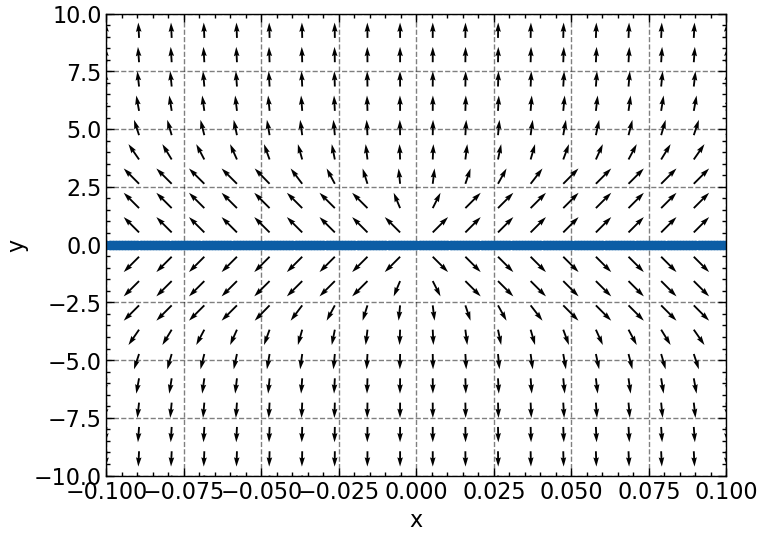

In [10]:
# Plot สนามไฟฟ้า
plt.scatter(Xp, Yp)
field_plot(E, x_min=-0.1, x_max=0.1, y_min=-10, y_max=10, num_grids=20)

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

จงหาสนามไฟฟ้าเนื่องจากประจุแบบเส้นยาว $10~m$ ที่วางอยู่บนแนวแกน $y$ โดยที่ประจุนี้มีความหนาแน่นประจุสม่ำเสมอ $\rho_l=1~\mu C/m$

ในกรณีนี้
$$\mathbf{r'}=
\begin{bmatrix}
0\\
t
\end{bmatrix}$$

In [56]:
import sympy as smp
import numpy as np
from libemag.emag_initials import *
from libemag.plots import field_plot
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# กำหนดตัวแปรที่จะใช้ใน Sympy
x, y, t, rho_l, epsilon_0 = smp.symbols('x y t rho_l epsilon_0')

In [3]:
rp = smp.Matrix([0, t])
dqdt = rho_l * smp.diff(rp, t).norm()
dqdt

rho_l

In [4]:
r = smp.Matrix([x, y])
rp = smp.Matrix([0, t])
sep = r - rp
sep

Matrix([
[     x],
[-t + y]])

In [5]:
dEdt = dqdt / (4 * smp.pi * epsilon_0) * sep / sep.norm()**3
dEdt

Matrix([
[       rho_l*x/(4*pi*epsilon_0*(Abs(x)**2 + Abs(t - y)**2)**(3/2))],
[rho_l*(-t + y)/(4*pi*epsilon_0*(Abs(x)**2 + Abs(t - y)**2)**(3/2))]])

In [25]:
E = smp.integrate(dEdt, [t, -5, 5]).subs({rho_l:1e-6, smp.pi:np.pi, epsilon_0:sp.constants.epsilon_0})

In [50]:
Ex_f = smp.lambdify([x, y], E[0])
Ey_f = smp.lambdify([x, y], E[1])

In [51]:
def E_func(x, y):
    Ex = Ex_f(x, y)
    Ey = Ey_f(x, y)
    field = np.array([Ex, Ey])
    return field

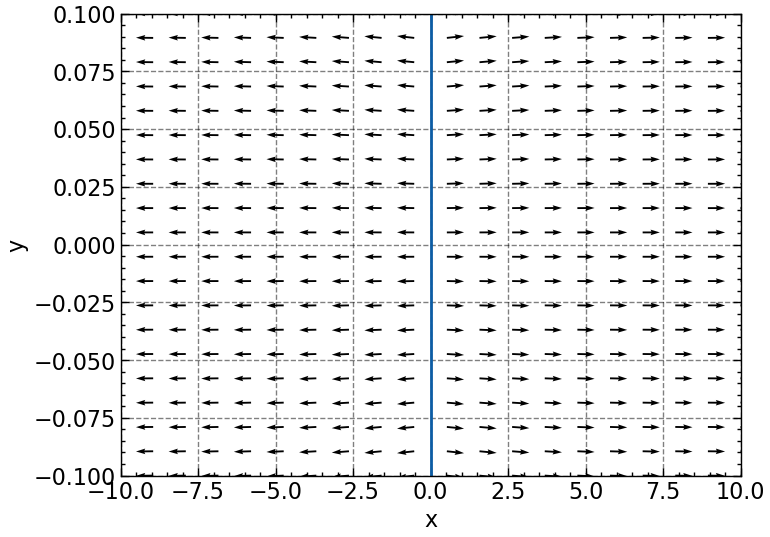

In [60]:
X = np.zeros(5)
Y = np.linspace(-5, 5, 5)
plt.plot(X, Y)
field_plot(E_func, x_min=-10, x_max=10, y_min=-0.1, y_max=0.1, num_grids=20)